In [1]:
from math import erf

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF

from IPython.display import Video

In [2]:
def cdf_n_std(t):
    return (1 + erf(t/(2. ** 0.5)))/2.


def cdf_normal(t, m=0, sd=1):
    return cdf_n_std((t - m)/sd)


def quartiles(x):
    # returns lower and upper quartiles
    s = np.sort(x)
    q2 = np.median(x)
    return np.median(s[s <= q2]), np.median(s[s >= q2])


def out(x):
    # returns mask for those values in sample, that are not outliers
    q1, q3 = quartiles(x)
    iqr = q3 - q1
    return (q1 - 1.5 * iqr <= x) & (x <= q3 + 1.5 * iqr)

In [3]:
mu, sigma = 0, 1
N = 2000

In [4]:
X = nr.normal(mu, sigma, N)
Z = nr.standard_cauchy(N)

S = pd.DataFrame({'X': X, 'Z': Z})

In [6]:
X_F = X[out(X)]
Z_F = Z[out(Z)]

In [7]:
M1, M2 = abs(S) > 1, abs(S) > 3
C1, C2 = np.sum(M1), np.sum(M2)
print(C1, C2, sep='\n')

X     655
Z    1054
dtype: int64
X      5
Z    436
dtype: int64


In [9]:
N_BINS = 42

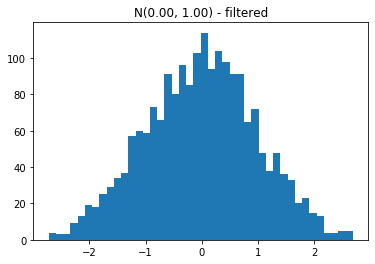

In [25]:
plt.hist(X_F, bins=N_BINS)
plt.title('N(%.2f, %.2f) - filtered' % (mu, sigma))
plt.show()

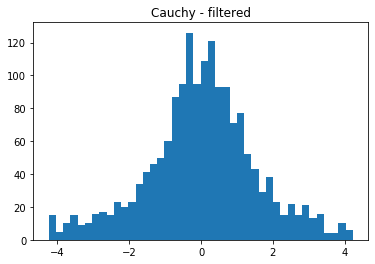

In [23]:
plt.hist(Z_F, bins=N_BINS)
plt.title('Cauchy - filtered')
plt.show()

In [15]:
E_CDF_X, E_CDF_Z = ECDF(X), ECDF(Z)
LS_X, LS_Z = np.linspace(np.min(X_F), np.max(X_F)), np.linspace(np.min(Z_F), np.max(Z_F))
E_X, E_Z = E_CDF_X(LS_X), E_CDF_Z(LS_Z)

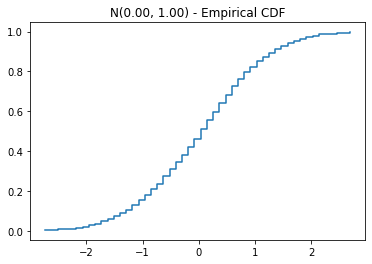

In [16]:
plt.step(LS_X, E_X, where='post')
plt.title('N(%.2f, %.2f) - Empirical CDF' % (mu, sigma))
plt.show()

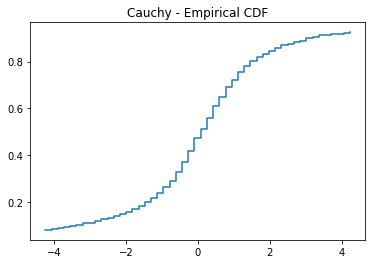

In [17]:
plt.step(LS_Z, E_Z, where='post')
plt.title('Cauchy - Empirical CDF')
plt.show()

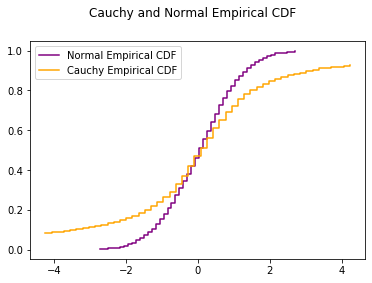

In [18]:
f, ax = plt.subplots(1, 1)
f.suptitle('Cauchy and Normal Empirical CDF', y=1)
ax.step(LS_X, E_X, color='purple', label='Normal Empirical CDF', where='post')
ax.step(LS_Z, E_Z, color='orange', label='Cauchy Empirical CDF', where='post')
ax.legend()
plt.show()

In [19]:
S_MEAN, S_SD = S.mean(), S.std()
print(S_MEAN, S_SD, sep='\n')

X   -0.011695
Z    0.834936
dtype: float64
X      1.015004
Z    174.748253
dtype: float64


In [20]:
P1_E = 1 - E_CDF_X(S_MEAN.X + S_SD.X * 3) + E_CDF_X(S_MEAN.X - S_SD.X * 3)
P1_T = 1 - cdf_normal(S_MEAN.X + S_SD.X * 3) + cdf_normal(S_MEAN.X - S_SD.X * 3)
print('E Normal CDF: %.4f\n'
      'T Normal CDF: %.4f' % (P1_E, P1_T))

E Normal CDF: 0.0015
T Normal CDF: 0.0023


In [ ]:
Video("test.mp4")